In [1]:
import h5py
import numpy as np
import skimage as sk
#print sk.__version__
from skimage import io
from matplotlib import pyplot as plt

/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from skimage import filters
from skimage import feature
from skimage import io
from scipy import ndimage as nd
from scipy import misc

### Loading the dataset stored in hdf5 format

In [3]:
h5f = h5py.File('LowRes_13434_overlapping_pairs.h5','r')
pairs = h5f['dataset_1'][:]
h5f.close()

In [4]:
print(pairs.shape)
print(pairs[0,:,:,0].dtype)
print(pairs[0,:,:,0].max())

(13434, 94, 93, 2)
int64
209


## Looking at some examples

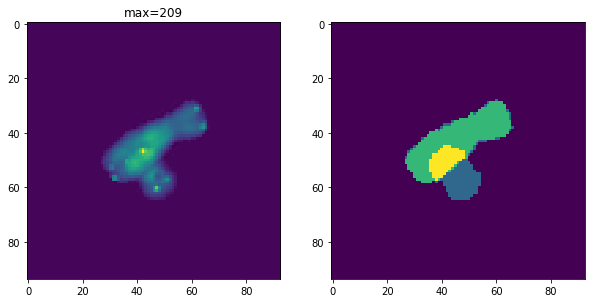

In [5]:
grey = pairs[0,:,:,0]
mask = pairs[0,:,:,1]
%matplotlib inline
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.imshow(grey)
plt.title('max='+str(grey.max()))
plt.subplot(122)
plt.imshow(mask, interpolation = 'nearest')

### Problem in the groundtruth label at low resolution:

The labels are a little noisy on the edge of the groundtruth label.

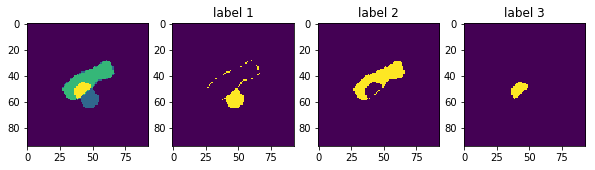

In [6]:
plt.figure(figsize = (10,12))
plt.subplot(141)
plt.imshow(mask, interpolation = 'nearest')
plt.subplot(142)
plt.title('label 1')
plt.imshow(mask == 1, interpolation = 'nearest')
plt.subplot(143)
plt.title('label 2')
plt.imshow(mask == 2, interpolation = 'nearest')
plt.subplot(144)
plt.title('label 3')
plt.imshow(mask == 3,  interpolation = 'nearest')